<a href="https://colab.research.google.com/github/kamalrajugambli/KamalRaju_INFO5731_SPRING2022/blob/main/INFO5731_Assignment_Four_1Kamal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [5]:
# Write your code here
# imports
import json
import pandas as pd
import spacy
from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import os.path
from gensim import corpora, models
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import pandas as pd



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
# opening file
df = pd.read_csv('https://raw.githubusercontent.com/kamalrajugambli/KamalRaju_INFO5731_SPRING2022/main/Review_text_Kamal.csv')
df['Review'] = df['Review'].fillna("")
df.head()



,Unnamed: 0,Review
0,0,Purchased this product advertised as fully unl...
1,1,I was feeling a bit skeptical after I placed m...
2,2,Phone was not unlocked could it use it
3,3,The screen came cracked and popped out of the ...
4,4,This is the best experience I have ever had wi...


In [7]:
# text preprocessing 
df['Lower Case'] = df['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
Tokenizer = RegexpTokenizer(r'\w+')
df['Tokenization'] = df['Lower Case'].apply(lambda x: Tokenizer.tokenize(x))
en_stop = set(nltk.corpus.stopwords.words('english'))
df['Tokens'] = df['Tokenization'].apply(lambda x: [i for i in x if not i in en_stop])
Stemmer = PorterStemmer()
df['Stemming'] = df['Tokens'].apply(lambda x: [Stemmer.stem(i) for i in x])

In [8]:
line = []
for i in range(0,len(df['Stemming'])):
    line+= df['Stemming'][i]
print(line)

['purchas', 'product', 'advertis', 'fulli', 'unlock', 'insert', 'sim', 'card', 'work', 'contact', 'servic', 'provid', 'check', 'imei', 'number', 'report', 'phone', 'still', 'lock', 'origin', 'carrier', 'phone', 'came', 'good', 'condit', 'use', 'servic', 'provid', 'feel', 'bit', 'skeptic', 'place', 'order', 'proven', 'wrong', 'phone', 'look', 'brand', 'new', 'besid', 'minim', 'light', 'scratch', 'almost', 'imposs', 'notic', 'batteri', 'life', 'still', '100', 'also', 'like', 'screen', 'protector', 'phone', 'phone', 'unlock', 'could', 'use', 'screen', 'came', 'crack', 'pop', 'frame', 'hope', 'return', 'process', 'goe', 'smoothli', 'best', 'experi', 'ever', 'buy', 'renew', 'phone', 'phone', 'came', 'origin', 'box', 'origin', 'charger', 'cabl', 'phone', 'look', 'excel', 'one', 'scratch', 'absolut', 'beauti', 'batteri', 'health', '100', 'definit', 'recommend', 'seller', 'gooverstock', 'definit', 'buy', 'care', 'mine', 'scratch', 'screen', 'small', 'still', 'use', 'peopl', 'dont', 'want', 'us

In [9]:
# Bigrams and Trigrams
Data = []
for line in df['Stemming']:
    Data.append(line)
    
bigram = models.Phrases(Data, min_count=5, threshold=100)
trigram = models.Phrases(bigram[Data], threshold=100)
bigram_mod = models.phrases.Phraser(bigram)
trigram_mod = models.phrases.Phraser(trigram)
print(trigram_mod[bigram_mod[Data[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['purchas', 'product', 'advertis', 'fulli_unlock', 'insert', 'sim_card', 'work', 'contact', 'servic', 'provid', 'check', 'imei', 'number', 'report', 'phone', 'still', 'lock', 'origin', 'carrier', 'phone', 'came', 'good', 'condit', 'use', 'servic', 'provid']


In [10]:
# Features (top n-gram phrases) used for topic modeling
def Bigrams(Data):
    return [bigram_mod[doc] for doc in Data]
  
def Trigrams(Data):
    return [trigram_mod[bigram_mod[doc]] for doc in Data]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    output= []
    for i in Data:
        doc = nlp(" ".join(i)) 
        output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return output

Bigrams_Data = Bigrams(Data)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
Lemma = lemmatization(Bigrams_Data, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(Lemma[:10])

[['product', 'sim', 'card', 'work', 'contact', 'check', 'number', 'report', 'phone', 'still', 'lock', 'origin', 'carrier', 'phone', 'come', 'good', 'condit', 'use'], ['feel', 'bit', 'skeptic', 'place', 'order', 'prove', 'wrong', 'phone', 'look', 'brand', 'new', 'besid', 'minim', 'light', 'scratch', 'almost', 'notic', 'life', 'still', 'also', 'screen', 'protector', 'phone'], ['phone', 'unlock', 'could', 'use'], ['screen', 'come', 'crack', 'pop', 'frame', 'hope', 'return', 'process'], ['good', 'ever', 'buy', 'renew', 'phone', 'phone', 'come', 'origin', 'charger', 'phone', 'look', 'scratch', 'definit', 'recommend', 'seller', 'gooverstock', 'definit', 'buy'], ['care', 'mine', 'scratch', 'screen', 'small', 'still', 'use', 'peopl', 'want', 'use', 'phone', 'scratch'], ['fight', 'long', 'time', 'final', 'give', 'look', 'place', 'onlin', 'price', 'way', 'price', 'point', 'feel', 'comfort', 'buy', 'phone', 'still', 'happi'], ['box', 'come', 'ear', 'phone', 'phone', 'keep', 'turn', 'set', 'app', 

In [11]:
id2word = corpora.Dictionary(Lemma)
Text1 = Lemma
corpus = [id2word.doc2bow(text) for text in Text1]
print(corpus[:10])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)], [(10, 2), (14, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1)], [(10, 1), (15, 1), (37, 1), (38, 1)], [(3, 1), (34, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)], [(3, 1), (6, 1), (9, 1), (10, 3), (25, 1), (33, 1), (45, 2), (46, 1), (47, 2), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1)], [(10, 1), (14, 1), (15, 2), (33, 2), (34, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1)], [(10, 1), (14, 1), (22, 1), (25, 1), (30, 1), (45, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1)], [(3, 1), (10, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1)], [(3, 2), (10, 2), (37, 1), (38, 1), (46, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1),

In [12]:
id2word[0]

'card'

In [13]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:10]]

[[('card', 1),
  ('carrier', 1),
  ('check', 1),
  ('come', 1),
  ('condit', 1),
  ('contact', 1),
  ('good', 1),
  ('lock', 1),
  ('number', 1),
  ('origin', 1),
  ('phone', 2),
  ('product', 1),
  ('report', 1),
  ('sim', 1),
  ('still', 1),
  ('use', 1),
  ('work', 1)],
 [('phone', 2),
  ('still', 1),
  ('almost', 1),
  ('also', 1),
  ('besid', 1),
  ('bit', 1),
  ('brand', 1),
  ('feel', 1),
  ('life', 1),
  ('light', 1),
  ('look', 1),
  ('minim', 1),
  ('new', 1),
  ('notic', 1),
  ('order', 1),
  ('place', 1),
  ('protector', 1),
  ('prove', 1),
  ('scratch', 1),
  ('screen', 1),
  ('skeptic', 1),
  ('wrong', 1)],
 [('phone', 1), ('use', 1), ('could', 1), ('unlock', 1)],
 [('come', 1),
  ('screen', 1),
  ('crack', 1),
  ('frame', 1),
  ('hope', 1),
  ('pop', 1),
  ('process', 1),
  ('return', 1)],
 [('come', 1),
  ('good', 1),
  ('origin', 1),
  ('phone', 3),
  ('look', 1),
  ('scratch', 1),
  ('buy', 2),
  ('charger', 1),
  ('definit', 2),
  ('ever', 1),
  ('gooverstock', 1),
 

In [14]:
data2 = ''
for i in range(0,len(df['Review'])):
    data2+= df['Review'][i]
print(data2)

nltk.download('punkt')
words = nltk.word_tokenize(data2)

Trigramss = nltk.trigrams(words)
freq = nltk.FreqDist(Trigramss)

Purchased this product advertised as fully unlocked. Inserted my sim card and it did not work. Contacted my service provider and they checked my IMEI number and it reported that the phone was still locked by the original carrier. Phone came in good condition just couldn't use any service provider.I was feeling a bit skeptical after I placed my order but I was proven wrong! The phone looks brand new besides some very minimal/ light scratches (almost impossible to notice) and the battery life is still at 100%. I also like that there was a screen protector on the phonePhone was not unlocked could it use itThe screen came cracked and popped out of the frame. Hopefully the return process goes smoothly.This is the best experience I have ever had with buying a renewed phone. The phone came in it’s original box with original charger and cable and the phone looks excellent, not one scratch on it absolutely beautiful and the battery health was at 100%. I definitely recommend the seller GoOversto

In [15]:
freq

FreqDist({('Purchased', 'this', 'product'): 1,
          ('this', 'product', 'advertised'): 1,
          ('product', 'advertised', 'as'): 1,
          ('advertised', 'as', 'fully'): 3,
          ('as', 'fully', 'unlocked'): 3,
          ('fully', 'unlocked', '.'): 6,
          ('unlocked', '.', 'Inserted'): 1,
          ('.', 'Inserted', 'my'): 1,
          ('Inserted', 'my', 'sim'): 1,
          ('my', 'sim', 'card'): 4,
          ('sim', 'card', 'and'): 2,
          ('card', 'and', 'it'): 1,
          ('and', 'it', 'did'): 4,
          ('it', 'did', 'not'): 7,
          ('did', 'not', 'work'): 15,
          ('not', 'work', '.'): 12,
          ('work', '.', 'Contacted'): 1,
          ('.', 'Contacted', 'my'): 1,
          ('Contacted', 'my', 'service'): 1,
          ('my', 'service', 'provider'): 4,
          ('service', 'provider', 'and'): 1,
          ('provider', 'and', 'they'): 2,
          ('and', 'they', 'checked'): 1,
          ('they', 'checked', 'my'): 1,
          ('checked'

In [16]:
# LDA model - Top 10 clusters
lDmodel = models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics = 10, 
                                   random_state=100,update_every=1,chunksize=100,
                                   passes=10,alpha='auto',per_word_topics=True)
from pprint import pprint
pprint(lDmodel.print_topics())
IDM1 = lDmodel[corpus]

[(0,
  '0.093*"condicion" + 0.069*"prácticament" + 0.035*"nice" + 0.034*"pue" + '
  '0.029*"touch" + 0.016*"show" + 0.014*"igual" + 0.014*"por" + 0.014*"cual" + '
  '0.013*"help"'),
 (1,
  '0.079*"appl" + 0.069*"could" + 0.056*"also" + 0.055*"charger" + '
  '0.045*"camera" + 0.033*"box" + 0.032*"load" + 0.030*"charg" + '
  '0.030*"origin" + 0.026*"card"'),
 (2,
  '0.092*"screen" + 0.068*"get" + 0.044*"scratch" + 0.035*"even" + '
  '0.035*"protector" + 0.030*"realli" + 0.022*"money" + 0.022*"go" + '
  '0.020*"first" + 0.020*"batteri"'),
 (3,
  '0.127*"sin" + 0.127*"llegó" + 0.040*"much" + 0.029*"pero" + 0.029*"thank" + '
  '0.024*"llevo" + 0.021*"old" + 0.020*"year" + 0.015*"transfer" + '
  '0.015*"raspon"'),
 (4,
  '0.158*"phone" + 0.060*"come" + 0.060*"work" + 0.050*"new" + 0.049*"good" + '
  '0.049*"great" + 0.043*"buy" + 0.031*"excelent" + 0.031*"look" + '
  '0.025*"would"'),
 (5,
  '0.038*"percent" + 0.034*"bad" + 0.033*"give" + 0.026*"deal" + 0.026*"renew" '
  '+ 0.024*"need" + 0.

In [17]:
from gensim.models import CoherenceModel
print('Perplexity: ', lDmodel.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=lDmodel, texts=Lemma, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Perplexity:  -6.465944823894645
Coherence Score:  0.5137535427538731


In [18]:
# LSA model - Top 10 clusters
lSamodel = models.LsiModel(corpus, num_topics = 10, id2word = id2word)
pprint(lSamodel.print_topics(num_topics = 10))

[(0,
  '0.813*"phone" + 0.193*"come" + 0.177*"work" + 0.149*"buy" + 0.146*"screen" '
  '+ 0.145*"new" + 0.133*"get" + 0.105*"scratch" + 0.101*"good" + 0.095*"use"'),
 (1,
  '0.563*"come" + -0.447*"phone" + 0.331*"screen" + 0.290*"scratch" + '
  '0.183*"new" + 0.175*"work" + 0.154*"protector" + 0.153*"great" + '
  '0.145*"good" + 0.139*"buy"'),
 (2,
  '0.691*"work" + -0.352*"screen" + 0.314*"great" + -0.249*"come" + '
  '0.227*"new" + -0.191*"scratch" + 0.162*"buy" + -0.145*"protector" + '
  '-0.135*"phone" + 0.103*"brand"'),
 (3,
  '-0.473*"screen" + 0.411*"new" + -0.403*"work" + 0.324*"come" + '
  '0.207*"brand" + -0.194*"get" + -0.148*"scratch" + 0.133*"buy" + '
  '0.133*"look" + 0.130*"phone"'),
 (4,
  '0.508*"come" + -0.434*"new" + -0.391*"buy" + -0.254*"screen" + 0.244*"work" '
  '+ -0.226*"scratch" + -0.210*"brand" + -0.170*"look" + -0.129*"get" + '
  '0.116*"great"'),
 (5,
  '-0.473*"buy" + -0.303*"good" + 0.288*"scratch" + -0.270*"get" + '
  '-0.265*"use" + 0.211*"screen" + 0.1

In [ ]:
# Summarization of topic for each cluster
'''
Topic1: screen is great and good to use
Topic2: phone came with scratch
Topic3: buy branded screen protecter
Topic4: the usage and look of phone is lovely
Topic5: good charger
Topic6: phone woth scratch other than everything is great
Topic7: new look and branded camera
Topic8: even apple phone has scratch
Topic9: phone and camera works great
Topic10: phone is a great buy

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [22]:
# Write your code here
# opening file
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
url = 'https://raw.githubusercontent.com/kamalrajugambli/KamalRaju_INFO5731_SPRING2022/main/review_text_training_%26_evaluation_data_Kamal.csv'
df = pd.read_csv(url)
df['Review'] = df['Review'].fillna("")
a = df['Review']
b = df['sentiment']



In [23]:
df.head()

,Unnamed: 0,Review,sentiment
0,0,Purchased this product advertised as fully unl...,Positive
1,1,I was feeling a bit skeptical after I placed m...,Negative
2,2,Phone was not unlocked could it use it,Neutral
3,3,The screen came cracked and popped out of the ...,Positive
4,4,This is the best experience I have ever had wi...,Positive


In [24]:
The two most commonly used methods for sentiment classification are SVM and logistic regression.

Because of the small size of my data, I chose logistic regression and support vector machine models.

SVM was chosen as my algorithm of choice due to its effectiveness in high-dimensional domains.

SyntaxError: ignored

In [25]:
# Selecting two supervised learning algorithm from scikit-learn library
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

In [26]:
# Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size = 0.2, random_state=42)
vect = CountVectorizer(min_df=2, ngram_range=(1, 2))
X_train = vect.fit(X_train).transform(X_train) 
X_test = vect.transform(X_test)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print("Logistic Regression:")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average = 'macro'))
print("Recall:",metrics.recall_score(y_test, y_pred,average = 'macro'))
print("f1 score:",metrics.f1_score(y_test, y_pred,average = 'macro'))

Logistic Regression:
Accuracy: 0.824390243902439
Precision: 0.7386860053526719
Recall: 0.7100605099162559
f1 score: 0.7192129576534381


In [27]:
# SVM
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size = 0.2, random_state=42)
vect = CountVectorizer(min_df=2, ngram_range=(1, 2))
X_train = vect.fit(X_train).transform(X_train) 
X_test = vect.transform(X_test)
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("SVM:")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average = 'macro'))
print("Recall:",metrics.recall_score(y_test, y_pred,average = 'macro'))
print("f1 score:",metrics.f1_score(y_test, y_pred,average = 'macro'))

SVM:
Accuracy: 0.8227642276422764
Precision: 0.7272917945569879
Recall: 0.7293436790631853
f1 score: 0.72791945446329


In [ ]:
# performance comparision
'''
Below are the metrics:

Logistic Regression:
Accuracy: 0.824390243902439
Precision: 0.7386860053526719
Recall: 0.7100605099162559
f1 score: 0.7192129576534381

SVM:
Accuracy: 0.8227642276422764
Precision: 0.7272917945569879
Recall: 0.7293436790631853
f1 score: 0.72791945446329

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731-spring2022/blob/main/assignments/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [28]:
# Write your code here


# downloading data
!wget https://github.com/unt-iialab/info5731-spring2022/raw/main/assignments/assignment4-question3-data.zip


--2022-05-10 04:23:41--  https://github.com/unt-iialab/info5731-spring2022/raw/main/assignments/assignment4-question3-data.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/unt-iialab/info5731-spring2022/main/assignments/assignment4-question3-data.zip [following]
--2022-05-10 04:23:42--  https://raw.githubusercontent.com/unt-iialab/info5731-spring2022/main/assignments/assignment4-question3-data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166409 (163K) [application/zip]
Saving to: ‘assignment4-question3-data.zip’

assignment4-questio 100%[===================>] 162.51K  --.-KB/s    in 0.

In [29]:
# extracting downloaded data
!unzip /content/assignment4-question3-data.zip

Archive:  /content/assignment4-question3-data.zip
  inflating: data_description.txt    
  inflating: test.csv                
  inflating: train.csv               


In [30]:
# loading data
train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")

In [31]:
# training dataset
train_dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [32]:
# test dataset
test_dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


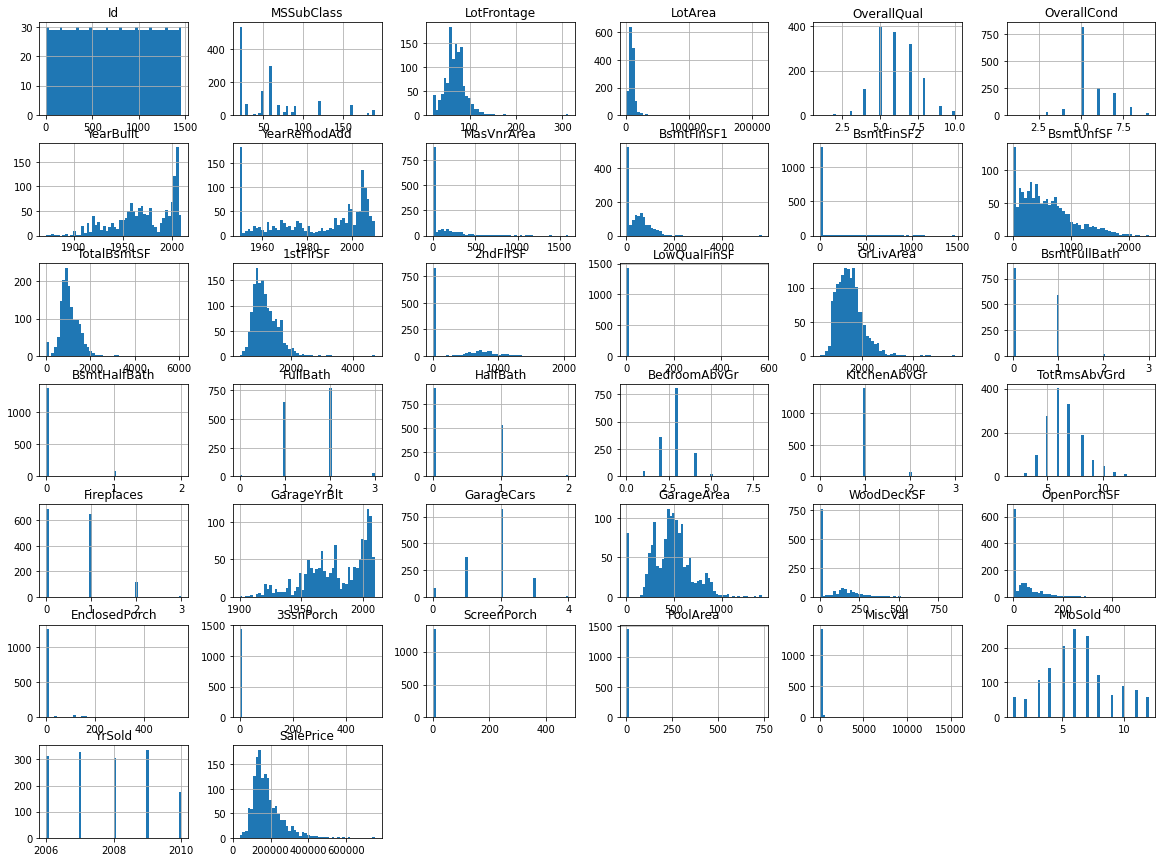

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
train_dataset.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [35]:
corr_matrix = train_dataset.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

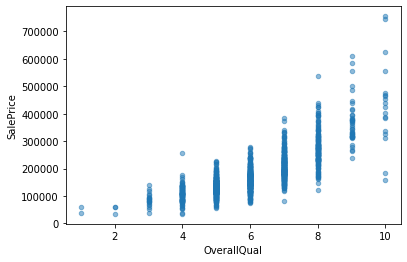

In [37]:
train_dataset.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.5)

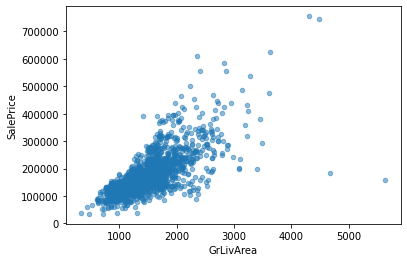

In [38]:
train_dataset.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=0.5)

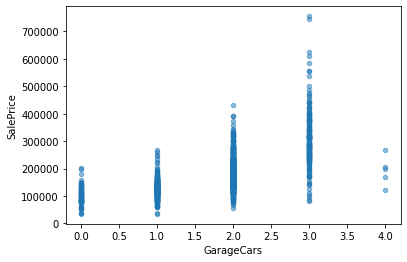

In [39]:
train_dataset.plot(kind="scatter", x="GarageCars", y="SalePrice", alpha=0.5)

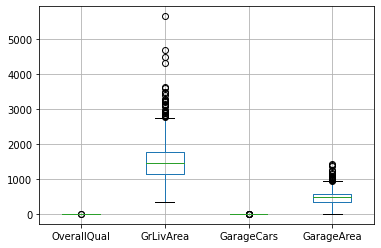

In [40]:
train_dataset.boxplot(column=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'])

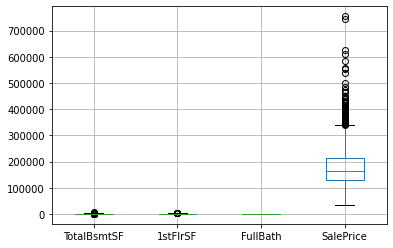

In [41]:
train_dataset.boxplot(column=['TotalBsmtSF', '1stFlrSF', 'FullBath', 'SalePrice'])

In [42]:
train_dataset.fillna(train_dataset.mean(), inplace = True)
test_dataset.fillna(test_dataset.mean(), inplace = True)

In [43]:
from sklearn.preprocessing import LabelEncoder
cols = ('GarageCond', 'RoofStyle', 'LandContour',  'Electrical', 'RoofMatl', 'Heating', 'Foundation', 'MiscFeature', 'SaleType', 'GarageType', 'SaleCondition', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle','PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual','BsmtExposure', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning')
for i in cols:
    end = LabelEncoder()
    end.fit(list(train_dataset[i].values))
    train_dataset[i] = end.transform(list(train_dataset[i].values))
x = train_dataset[train_dataset.columns[:80]]
y = train_dataset['SalePrice']    
from sklearn import model_selection
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(x, y, test_size=0.2)
from sklearn.linear_model import LinearRegression
from sklearn import metrics

reg = LinearRegression()  
reg.fit(xtrain, ytrain)
values_predcited = reg.predict(xtest)
print("R-Square value of above linear Regression model : ", reg.score(xtrain,ytrain))

R-Square value of above linear Regression model :  0.8462816462788071


In [44]:
sales_predict = pd.DataFrame(values_predcited, columns =['Predicted Sales'])
sales_predict

,Predicted Sales
0,362136.396264
1,313719.036878
2,127955.457977
3,137873.003170
4,132485.998218
...,...
287,120443.780063
288,373446.678057
289,123508.260188
290,140853.838565
